<a href="https://colab.research.google.com/github/Dhamu785/Assignments/blob/main/Basic%5C1_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing libaries**

In [704]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, linear_model, preprocessing
import pickle

### **Read data**

In [667]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks YouTube tutorials/zzz Assignments/hosue_data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### **Data pre-processing**

In [668]:
columns = df.columns
print(columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


In [669]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [670]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [671]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [672]:
df.drop_duplicates()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [673]:
# Removing null values
df_price = df[df['price'] != 0]
print(f'Length of data: {len(df_price)}')

Length of data: 4551


In [674]:
#checking fractions
bed_room = ['True' for i in df_price['bedrooms'] if i.is_integer() == False]
bath_room = ['True' for i in df_price['bathrooms'] if i.is_integer() == False]
floors = ['True' for i in df_price['floors'] if i.is_integer() == False]


In [675]:
print(f'Bed rooms: {len(bed_room)}')
print(f'bath_room: {len(bath_room)}')
print(f'floors: {len(floors)}')

Bed rooms: 0
bath_room: 3197
floors: 482


In [676]:
#removing fractions
floor_data = ['True'  if i.is_integer() else "False" for i in df_price['floors']]
df_price['floor_data'] = floor_data
len(df_price)

4551

In [677]:
df_floors = df_price[df_price['floor_data'] == 'True']
len(df_floors)

4069

In [678]:
#outlier detections
std = df_floors['price'].std()
max = df_floors['price'].mean() + std*3
min = df_floors['price'].mean() - std*3

print(f"Min = {min}, Max = {max}")

Min = -1198195.5928285473, Max = 2299249.0649734177


In [679]:
df_floors['price'].min()

7800.0

In [680]:
df_floors['price'].max()

26590000.0

In [681]:
df_outlier_removed = df_floors[df_floors['price'].between(min,max,inclusive='both')]
len(df_outlier_removed)

4041

In [682]:
df_outlier_removed.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'floor_data'],
      dtype='object')

In [683]:
# remoce unwanted columns
col = ['date','street','statezip','country','floor_data']
df_main = df_outlier_removed.drop(col,axis=1)
df_main.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,Seattle
6,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,Redmond


In [684]:
df_main['renovated'] = df_main['yr_renovated'].apply(lambda x:0 if x==0 else 1)
df_main.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,renovated
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,1
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,Seattle,1
6,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,Redmond,0


In [685]:
df_main = df_main.drop(['yr_built','yr_renovated'],axis=1)
df_main.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,renovated
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,1
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,Seattle,1
6,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,Redmond,0


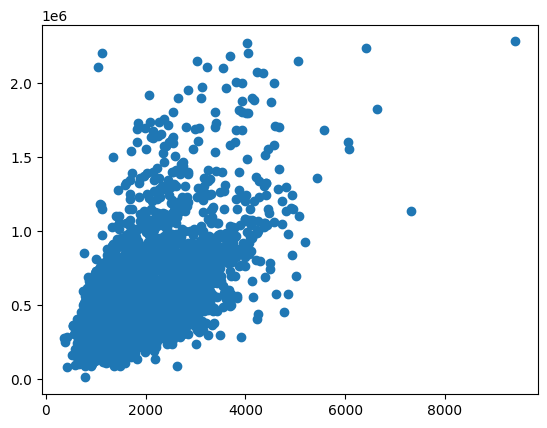

In [686]:
plt.scatter(df_main['sqft_above'],df_main['price'])
plt.show()

# The outlier will skew the results so, the process is to remove outliers

In [687]:
# remove outliers
std = df_main['sqft_living'].std()
max = df_main['sqft_living'].mean() + std*3
min = df_main['sqft_living'].mean() - std*3
df_outlier_removed_sq_living = df_main[df_main['sqft_living'].between(min,max,inclusive='both')]
len(df_outlier_removed_sq_living)

4005

In [688]:
std = df_outlier_removed_sq_living['sqft_lot'].std()
max = df_outlier_removed_sq_living['sqft_lot'].mean() + std*3
min = df_outlier_removed_sq_living['sqft_lot'].mean() - std*3
df_outlier_removed_sq_lot = df_outlier_removed_sq_living[df_outlier_removed_sq_living['sqft_lot'].between(min,max,inclusive='both')]
len(df_outlier_removed_sq_lot)

3935

In [689]:
std = df_outlier_removed_sq_lot['sqft_above'].std()
max = df_outlier_removed_sq_lot['sqft_above'].mean() + std*3
min = df_outlier_removed_sq_lot['sqft_above'].mean() - std*3
df_outlier_removed_sq_above = df_outlier_removed_sq_lot[df_outlier_removed_sq_lot['sqft_above'].between(min,max,inclusive='both')]
len(df_outlier_removed_sq_above)

3896

In [690]:
std = df_outlier_removed_sq_above['sqft_basement'].std()
max = df_outlier_removed_sq_above['sqft_basement'].mean() + std*3
min = df_outlier_removed_sq_above['sqft_basement'].mean() - std*3
df_outlier_removed_sq_base = df_outlier_removed_sq_above[df_outlier_removed_sq_above['sqft_basement'].between(min,max,inclusive='both')]
len(df_outlier_removed_sq_base)

3861

In [691]:
X = df_outlier_removed_sq_base.drop('price',axis=1)
Y = df_outlier_removed_sq_base['price']
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,renovated
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,1
5,2.0,1.00,880,6380,1.0,0,0,3,880,0,Seattle,1
6,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,Redmond,0


In [692]:
len(X['city'].unique())

43

In [693]:
# scaling
scale = preprocessing.MinMaxScaler()
X['sqft_living'] = scale.fit_transform(X[['sqft_living']])
# X['sqft_lot'] = scale.fit_transform(X[['sqft_lot']])
X['sqft_above'] = scale.fit_transform(X[['sqft_above']])
X['sqft_basement'] = scale.fit_transform(X[['sqft_basement']])


In [694]:
City = pd.get_dummies(X['city']).drop('Algona',axis=1)
X = X.drop('city',axis=1)

In [695]:
XX = pd.concat([X,City], axis=1)
XX.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
2,3.0,2.00,0.347439,11947,1.0,0,0,4,0.416000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2.25,0.363029,8030,1.0,0,0,4,0.168000,0.621118,...,0,0,0,0,0,0,0,0,0,0
4,4.0,2.50,0.349666,10500,1.0,0,0,4,0.205333,0.496894,...,0,0,0,0,0,0,0,0,0,0
5,2.0,1.00,0.113586,6380,1.0,0,0,3,0.136000,0.000000,...,0,1,0,0,0,0,0,0,0,0
6,2.0,2.00,0.218263,2560,1.0,0,0,3,0.261333,0.000000,...,0,0,0,0,0,0,0,0,0,0


### **Splitting data**

In [696]:
x_train,x_test, y_train,y_test = model_selection.train_test_split(XX,Y,test_size=0.8)
print(f'Length of x_train = {len(x_train)}')
print(f'Length of x_test = {len(x_test)}')
print(f'Length of y_train = {len(y_train)}')
print(f'Length of y_test = {len(y_test)}')

Length of x_train = 772
Length of x_test = 3089
Length of y_train = 772
Length of y_test = 3089


In [697]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
4058,2.0,2.5,0.487751,2500,2.0,0,0,5,0.352000,0.540373,...,0,1,0,0,0,0,0,0,0,0
1552,4.0,2.0,0.258352,6375,2.0,0,0,3,0.309333,0.000000,...,0,0,0,0,0,0,0,0,0,0
1650,4.0,3.5,0.755011,5000,2.0,0,0,3,0.664000,0.559006,...,0,1,0,0,0,0,0,0,0,0
1747,3.0,2.5,0.300668,99916,2.0,0,0,4,0.360000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3313,3.0,2.5,0.447661,6832,2.0,0,0,3,0.536000,0.000000,...,0,0,0,0,1,0,0,0,0,0


In [698]:
x_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'renovated', 'Auburn', 'Beaux Arts Village', 'Bellevue',
       'Black Diamond', 'Bothell', 'Burien', 'Carnation', 'Clyde Hill',
       'Covington', 'Des Moines', 'Duvall', 'Enumclaw', 'Fall City',
       'Federal Way', 'Inglewood-Finn Hill', 'Issaquah', 'Kenmore', 'Kent',
       'Kirkland', 'Lake Forest Park', 'Maple Valley', 'Medina',
       'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park', 'North Bend',
       'Pacific', 'Ravensdale', 'Redmond', 'Renton', 'Sammamish', 'SeaTac',
       'Seattle', 'Shoreline', 'Skykomish', 'Snoqualmie', 'Snoqualmie Pass',
       'Tukwila', 'Vashon', 'Woodinville', 'Yarrow Point'],
      dtype='object')

In [699]:
# columns = ['view']
# x_train = x_train.drop(columns,axis=1)
# x_test = x_test.drop(columns,axis=1)

### **Model training**

In [700]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [701]:
model.score(x_test,y_test)

0.647723871762568

In [702]:
model.score(x_train,y_train)

0.710758229416288

In [703]:
model.coef_

array([-2.81840404e+04, -1.69829086e+04,  4.98180290e+05, -4.21023095e-01,
        4.62594971e+03,  2.56905525e+05,  6.01696365e+04,  4.39303044e+04,
        5.53633781e+05,  9.98154162e+04, -3.24835378e+02,  2.93547009e+04,
        5.71625421e+05,  3.63672995e+05,  1.09500794e+05,  1.76658300e+05,
        7.23487204e+04,  1.47224729e+05,  6.95972378e+05,  1.60220085e+03,
        3.21118747e+04,  1.06711042e+05,  6.62402120e+04,  2.12447822e+05,
        3.33330452e+03,  2.01303898e+05,  2.48102117e+05,  1.08616254e+05,
        2.24375450e+04,  3.13227880e+05,  1.23400807e+05,  2.09333116e+04,
        6.28617863e+05,  5.34478767e+05, -1.45519152e-10,  1.92392689e+05,
        2.97316067e+05,  1.88330586e+05,  1.05402550e+05, -1.74622983e-10,
        2.75305710e+05,  5.94704066e+04,  2.25816142e+05,  8.38773944e+04,
        3.33461871e+05,  1.86913554e+05,  0.00000000e+00,  1.25086520e+05,
        0.00000000e+00,  5.18383661e+04,  1.21108807e+05,  1.83641421e+05,
        6.79686570e+05])

### **save model**

In [708]:
file_name = "model.pickle"
pickle.dump(model, open(file_name, 'wb'))

### **Load model**

In [709]:
# load model and predictions
mdl_loaded = pickle.load(open(file_name,'rb'))
mdl_loaded.score(x_test,y_test)

0.647723871762568

### **Predictions**

In [718]:
x_test.values[0]

array([4.00000000e+00, 2.50000000e+00, 5.01113586e-01, 9.87300000e+03,
       2.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.00000000e+00,
       6.00000000e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [724]:
prediction_1 = mdl_loaded.predict([x_test.values[0]])
exact_val_1 = y_test.values[0]
print(f"Prediction = {prediction_1}, Exact value = {exact_val_1}")

Prediction = [663399.40199377], Exact value = 600000.0


In [725]:
prediction_2 = mdl_loaded.predict([x_test.values[1]])
exact_val_2 = y_test.values[1]
prediction_3 = mdl_loaded.predict([x_test.values[2]])
exact_val_3 = y_test.values[2]
prediction_4 = mdl_loaded.predict([x_test.values[3]])
exact_val_4 = y_test.values[3]
prediction_5 = mdl_loaded.predict([x_test.values[4]])
exact_val_5 = y_test.values[4]
prediction_6 = mdl_loaded.predict([x_test.values[5]])
exact_val_6 = y_test.values[5]
prediction_7 = mdl_loaded.predict([x_test.values[6]])
exact_val_7 = y_test.values[6]
print(f"Prediction = {prediction_2}, Exact value = {exact_val_2}")
print(f"Prediction = {prediction_3}, Exact value = {exact_val_3}")
print(f"Prediction = {prediction_4}, Exact value = {exact_val_4}")
print(f"Prediction = {prediction_5}, Exact value = {exact_val_5}")
print(f"Prediction = {prediction_6}, Exact value = {exact_val_6}")
print(f"Prediction = {prediction_7}, Exact value = {exact_val_7}")


Prediction = [452650.09760075], Exact value = 437000.0
Prediction = [323866.70067062], Exact value = 380000.0
Prediction = [273221.96534836], Exact value = 385000.0
Prediction = [812986.58543769], Exact value = 869000.0
Prediction = [215084.46008322], Exact value = 252350.0
Prediction = [64283.55848797], Exact value = 80000.0
